In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip"

In [ ]:
data_df = pd.read_csv(url, sep=";", header=0, low_memory=False, infer_datetime_format=True, parse_dates={'timestamp':[0,1]}, index_col=['timestamp'])

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    object 
 1   Global_reactive_power  object 
 2   Voltage                object 
 3   Global_intensity       object 
 4   Sub_metering_1         object 
 5   Sub_metering_2         object 
 6   Sub_metering_3         float64
dtypes: float64(1), object(6)
memory usage: 126.7+ MB


In [ ]:
data_df.isna().sum()

Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [ ]:
data_df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
timestamp,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [ ]:
data_df.tail()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
timestamp,,,,,,,
2010-11-26 20:58:00,0.946,0.000,240.430,4.000,0.000,0.000,0.0
2010-11-26 20:59:00,0.944,0.000,240.000,4.000,0.000,0.000,0.0
2010-11-26 21:00:00,0.938,0.000,239.820,3.800,0.000,0.000,0.0
2010-11-26 21:01:00,0.934,0.000,239.700,3.800,0.000,0.000,0.0
2010-11-26 21:02:00,0.932,0.000,239.550,3.800,0.000,0.000,0.0


In [ ]:
data_df.shape

(2075259, 7)

In [ ]:
data_df.Global_active_power.mean()

In [ ]:
data_df.describe(include='all')

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2075259,2075259,2075259,2075259,2075259,2075259,2.049280e+06
unique,4187,533,2838,222,89,82,NaN
top,?,0.000,?,1.000,0.000,0.000,NaN
freq,25979,481561,25979,172785,1880175,1436830,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,6.458447e+00
std,NaN,NaN,NaN,NaN,NaN,NaN,8.437154e+00
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
50%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00
75%,NaN,NaN,NaN,NaN,NaN,NaN,1.700000e+01


In [ ]:
#percentage of missing data
NaN_values = data_df.isna().sum().sum() / data_df.shape[0]
print(f"Percentage of missing values: {NaN_values:.2%}")

Percentage of missing values: 1.25%


In [ ]:
data_df[data_df == '?']

2075259

In [ ]:
25979*7

181853

In [ ]:

data_df.replace('?', np.nan, inplace=True)

In [ ]:
data_df.isna().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [ ]:
data_df.describe(include='all')

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2049280,2049280,2049280,2049280,2049280,2049280,2.049280e+06
unique,4186,532,2837,221,88,81,NaN
top,0.218,0.000,241.180,1.000,0.000,0.000,NaN
freq,9565,481561,3559,172785,1880175,1436830,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,6.458447e+00
std,NaN,NaN,NaN,NaN,NaN,NaN,8.437154e+00
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
50%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00
75%,NaN,NaN,NaN,NaN,NaN,NaN,1.700000e+01


In [ ]:
data_df.dtypes

Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [ ]:

data_df = data_df.astype('float32')

In [ ]:
data_df.dtypes

Global_active_power      float32
Global_reactive_power    float32
Voltage                  float32
Global_intensity         float32
Sub_metering_1           float32
Sub_metering_2           float32
Sub_metering_3           float32
dtype: object

In [ ]:


data_df_fill = data_df.fillna(data_df.mean())

In [ ]:
data_df_fill.isna().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [ ]:
data_df_fill.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.050655e+00,1.120142e-01,3.219643e+00,4.416490e+00,6.114397e+00,5.785470e+00,8.384178e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.100000e-01,4.800000e-02,2.390200e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.300000e-01,1.020000e-01,2.409600e+02,2.800000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.520000e+00,1.920000e-01,2.428600e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [ ]:


data_df_fill.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.247017,-0.399762,0.998889,0.484401,0.434569,0.638555
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120,0.123111,0.139231,0.089617
Voltage,-0.399762,-0.112246,1.000000,-0.411363,-0.195976,-0.167405,-0.268172
Global_intensity,0.998889,0.266120,-0.411363,1.000000,0.489298,0.440347,0.626543
Sub_metering_1,0.484401,0.123111,-0.195976,0.489298,1.000000,0.054721,0.102571
Sub_metering_2,0.434569,0.139231,-0.167405,0.440347,0.054721,1.000000,0.080872
Sub_metering_3,0.638555,0.089617,-0.268172,0.626543,0.102571,0.080872,1.000000


In [ ]:


daily_data = data_df_fill.resample('D').sum()

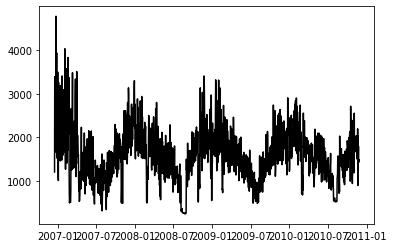

In [ ]:

plt.plot(daily_data.index, daily_data['Global_active_power'], color='black')

In [ ]:

daily_data.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.041098,0.062472,0.999182,0.545338,0.481370,0.732613
Global_reactive_power,0.041098,1.000000,0.050499,0.062937,0.319394,0.182199,0.035568
Voltage,0.062472,0.050499,1.000000,0.052267,-0.003968,-0.013712,0.095774
Global_intensity,0.999182,0.062937,0.052267,1.000000,0.557974,0.490772,0.724146
Sub_metering_1,0.545338,0.319394,-0.003968,0.557974,1.000000,0.251585,0.308917
Sub_metering_2,0.481370,0.182199,-0.013712,0.490772,0.251585,1.000000,0.198360
Sub_metering_3,0.732613,0.035568,0.095774,0.724146,0.308917,0.198360,1.000000


In [ ]:
import scipy.stats
scipy.stats.pearsonr(daily_data.Global_active_power, daily_data.Global_reactive_power)

(0.04109783731322767, 0.11877368202302323)

In [ ]:
daily_data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
timestamp,,,,,,,
2006-12-16,1209.176025,34.922001,93552.53125,5180.799805,0.0,546.0,4926.0
2006-12-17,3390.459961,226.005997,345725.31250,14398.599609,2033.0,4187.0,13341.0
2006-12-18,2203.825928,161.792007,347373.62500,9247.200195,1063.0,2621.0,14018.0
2006-12-19,1666.193970,150.942001,348479.00000,7094.000000,839.0,7602.0,6197.0
2006-12-20,2225.748047,160.998001,348923.62500,9313.000000,0.0,2648.0,14063.0


In [ ]:
uni_data = daily_data.reset_index()[['timestamp', 'Global_active_power']].rename(columns={'timestamp':'ds', 'Global_active_power':'y'})

x_test = uni_data.tail(365)
x_train = uni_data[:-365]

In [ ]:
x_train.head()

,ds,y
0,2006-12-16,1209.176025
1,2006-12-17,3390.459961
2,2006-12-18,2203.825928
3,2006-12-19,1666.193970
4,2006-12-20,2225.748047


In [ ]:
x_test.head()

,ds,y
1077,2009-11-27,1380.026001
1078,2009-11-28,1858.949951
1079,2009-11-29,1650.962036
1080,2009-11-30,1745.189941
1081,2009-12-01,1756.378052


In [ ]:

from fbprophet import Prophet
model = Prophet()

In [ ]:
model.fit(x_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = model.make_future_dataframe(periods=365)

In [ ]:
forecast = model.predict(x_test)

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-365:].head()

,ds,yhat,yhat_lower,yhat_upper
0,2009-11-27,2102.540170,1522.769007,2642.778848
1,2009-11-28,2405.826389,1837.139507,2963.041895
2,2009-11-29,2380.009872,1849.542486,2924.953830
3,2009-11-30,1980.327534,1391.162713,2548.920500
4,2009-12-01,2101.279569,1575.893048,2628.409616


In [ ]:
from fbprophet.plot import plot_plotly, plot_components_plotly

In [ ]:
plot_plotly(model, forecast)

In [ ]:
plot_components_plotly(model, forecast)

# Metric caluclations

In [ ]:
def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:

mape(x_test['y'], forecast['yhat'])

20.902088663607095

In [ ]:

from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(x_test['y'], forecast['yhat'][-365:])
rmse = sqrt(mse)
print(mse)
print(rmse)

140328.33209080368
374.604233946713


# Multi

In [ ]:


multi_df = daily_data.reset_index().rename(columns={'timestamp':'ds', 'Global_active_power':'y',
                                                        "Global_reactive_power": "add1","Voltage": "add2",
                                                        "Global_intensity": "add3","Sub_metering_1": "add4",
                                                        "Sub_metering_2": "add5","Sub_metering_3": "add6"})

x_test_multi = multi_df.tail(365)

x_train_multi = multi_df[:-365]

In [ ]:

multi_model = Prophet()

In [ ]:
multi_model.add_regressor('add1')
multi_model.add_regressor('add2')
multi_model.add_regressor('add3')
multi_model.add_regressor('add4')
multi_model.add_regressor('add5')
multi_model.add_regressor('add6')

In [ ]:
multi_model.fit(x_train_multi)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future_multi = multi_model.make_future_dataframe(periods=365)
future_multi['add1'] = multi_df['add1'].values
future_multi['add2'] = multi_df['add2'].values
future_multi['add3'] = multi_df['add3'].values
future_multi['add4'] = multi_df['add4'].values
future_multi['add5'] = multi_df['add5'].values
future_multi['add6'] = multi_df['add6'].values

In [ ]:
forecast_multi = multi_model.predict(future_multi)

In [ ]:
forecast_multi[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-365:].head()

,ds,yhat,yhat_lower,yhat_upper
1077,2009-11-27,1381.189105,1365.409402,1398.226012
1078,2009-11-28,1862.056061,1844.835443,1878.556454
1079,2009-11-29,1644.336570,1628.318460,1660.714981
1080,2009-11-30,1742.940683,1726.439860,1760.719926
1081,2009-12-01,1762.681666,1746.419577,1779.164439


In [ ]:
plot_plotly(multi_model, forecast_multi)

In [ ]:
plot_components_plotly(multi_model, forecast_multi)

In [ ]:

mape(x_test_multi['y'], forecast_multi['yhat'][-365:])

3.0445761457342444

In [ ]:

mse_multi = mean_squared_error(x_test_multi['y'], forecast_multi['yhat'][-365:])
rmse_multi = sqrt(mse_multi)

print(mse_multi)
print(rmse_multi)

2014.1329026071137
44.87909204303396


# Metrics Appendix - Using Cross Validation

In [ ]:
m = Prophet()

In [ ]:
m.fit(uni_data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
from fbprophet.diagnostics import cross_validation

df_cv = cross_validation(m, initial="1076 days", period="1 days", horizon='1 days')

INFO:fbprophet:Making 365 forecasts with cutoffs between 2009-11-26 00:00:00 and 2010-11-25 00:00:00


  0%|          | 0/365 [00:00<?, ?it/s]

In [ ]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2009-11-27,2099.140908,1555.389256,2717.281335,1380.026001,2009-11-26
1,2009-11-28,2382.074694,1790.476109,2955.233558,1858.949951,2009-11-27
2,2009-11-29,2339.943870,1796.077093,2929.681878,1650.962036,2009-11-28
3,2009-11-30,1916.713101,1403.089208,2505.212308,1745.189941,2009-11-29
4,2009-12-01,2035.590156,1477.924271,2590.210884,1756.378052,2009-11-30


In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)

In [ ]:
df_p

,horizon,mse,rmse,mae,mape,mdape,coverage
0,1 days,132572.498543,364.105065,273.28823,0.19688,0.134385,0.884932


## multivariate

In [ ]:
m2 = Prophet()

In [ ]:
m2.fit(multi_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
df_cv_multi = cross_validation(m2, initial="1076 days", period="1 days", horizon='1 days')

INFO:fbprophet:Making 365 forecasts with cutoffs between 2009-11-26 00:00:00 and 2010-11-25 00:00:00


  0%|          | 0/365 [00:00<?, ?it/s]

In [ ]:
df_cv_multi.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2009-11-27,2099.140908,1550.403088,2668.813108,1380.026001,2009-11-26
1,2009-11-28,2382.074694,1825.329037,2910.246828,1858.949951,2009-11-27
2,2009-11-29,2339.943870,1775.519426,2883.438530,1650.962036,2009-11-28
3,2009-11-30,1916.713101,1381.809512,2482.503712,1745.189941,2009-11-29
4,2009-12-01,2035.590156,1465.309884,2632.805990,1756.378052,2009-11-30


In [ ]:
df_p_multi = performance_metrics(df_cv_multi)

In [ ]:
df_p_multi

,horizon,mse,rmse,mae,mape,mdape,coverage
0,1 days,132572.498543,364.105065,273.28823,0.19688,0.134385,0.884932
